In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('default')
import plotly.express as px
churn_data = pd.read_csv(r'C:\Users\User\Desktop\p2\git\my_works\data\база\churn.csv')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#9.1 Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

C:\Temp\ipykernel_10012\1043878834.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


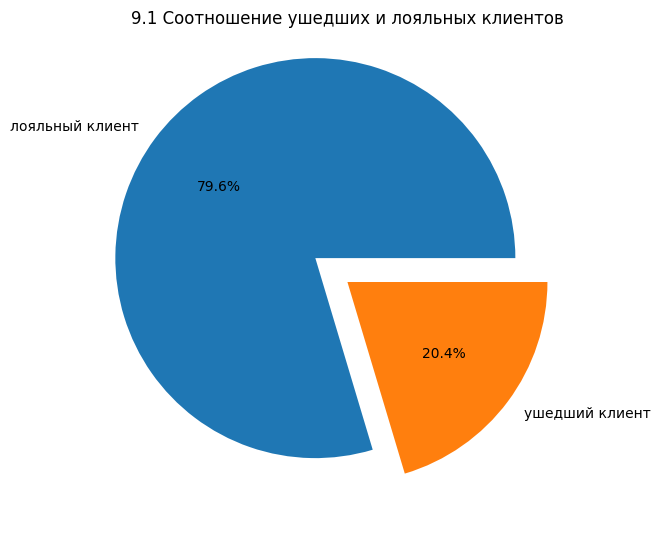

In [3]:
churn_data = churn_data.drop(['RowNumber'], axis=1)
Exited_churn_data = churn_data['Exited'].value_counts()
fig= plt.figure(figsize=(5,5))
axes= fig.add_axes([0,0,1,1])
axes.pie(Exited_churn_data, labels=['лояльный клиент', 'ушедший клиент'], autopct='%.1f%%', explode=[0.2,0]); 
axes.set_title('9.1 Соотношение ушедших и лояльных клиентов')
fig.show()

Из диаграммы видно соотношение в процентах: 1 — ушедших клиентов, 0 — лояльных клиент. Преобладающую долю состаляют лояльные клиенты, которые в 4 раза больше.

#9.2 Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


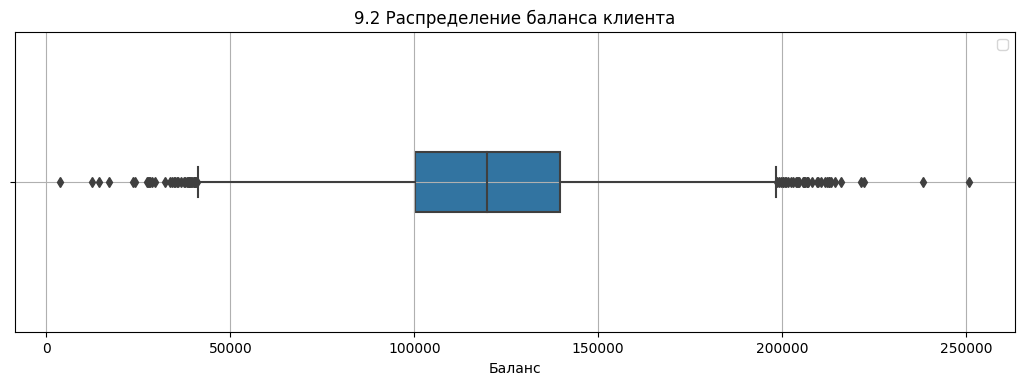

In [4]:
fig = plt.figure(figsize = (10,3))
boxplot = fig.add_axes([0, 0, 1, 1])
boxplot = sns.boxplot(data=churn_data[churn_data['Balance']>2500], x='Balance', orient='h', width=0.2)
boxplot.set_title('9.2 Распределение баланса клиента')
boxplot.set_xlabel('Баланс')
boxplot.xaxis.set_tick_params()
boxplot.grid()
boxplot.legend();

Из  диаграммы видно что распределение баланса пользователей, у которых на счету больше 2 500 долларов. Длина ящика с усами от 47000 до 199000 причем медианный баланс клиентов составляет 120000.

#9.3 Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

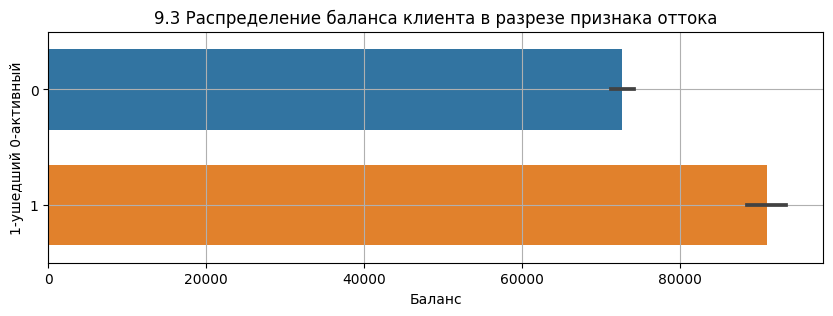

In [18]:

fig= plt.figure(figsize = (10,3))
barplot=sns.barplot(data= churn_data, y='Exited', x = 'Balance', orient='h', width=0.7)
barplot.set_title('9.3 Распределение баланса клиента в разрезе признака оттока')
barplot.set_xlabel('Баланс')
barplot.set_ylabel('1-ушедший 0-активный')
barplot.grid()


Из диаграммы видно что ушедший клиент(1) - с более высоким балансом, активный клиент(0) - с менее высоким балансом. Возможно клиенты получают не достачно высокий доход с высокого баланса, тогда как клиенты с менее высоким балансом хотят в основном сохратить денежные средства а не преумножить их.

#9.4 Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

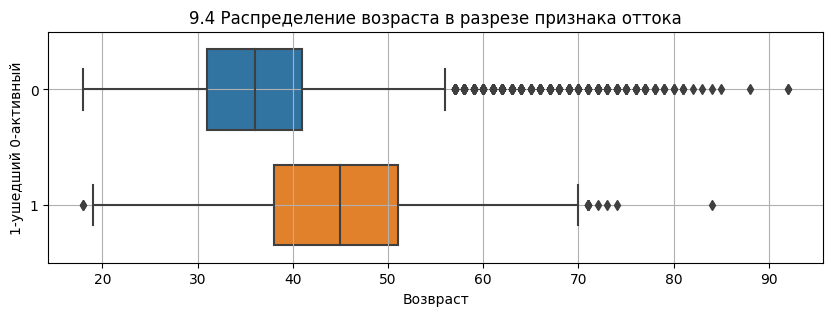

In [19]:
fig= plt.figure(figsize = (10,3))
#boxplot=sns.barplot(data= churn_data, y='Exited', x = 'Age', orient='h', width=0.7)
#box.set_title('9.4 Распределение возраста в разрезе признака оттока')
#boxplot.set_xlabel('Возвраст')
#boxplot.set_ylabel('1-ушедшийб 2-активный')
#boxplot.grid()
boxplot=sns.boxplot(data= churn_data, y='Exited', x = 'Age', orient='h', width=0.7)
boxplot.set_title('9.4 Распределение возраста в разрезе признака оттока')
boxplot.set_xlabel('Возвраст')
boxplot.set_ylabel('1-ушедший 0-активный')
boxplot.grid()
#

Из диаграммы видно что ушедшие в возврасте от 38 до 52 лет, медиана 45 лет. Активные клиенты с 32 до 42 лет, медиана 36 лет. Выбросов больше у активных клиентов.

#9.5 Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты.

In [6]:
ch_Est = churn_data.groupby(['CreditScore', 'Exited'], as_index=False)['EstimatedSalary'].mean()
fig = px.scatter(data_frame=ch_Est, x = 'CreditScore', y = 'EstimatedSalary', color='Exited', width=1200, height=600, title='9.5 Взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты')
fig.show()

Из диаграммы видно что взаимосвязи между кредитным рейтингом и его предпологаемой заработной платы нет. При высокой заработной плате клиент может иметь низкий кредитный рейтинг и наоборот.

#9.6 Кто чаще уходит, мужчины или женщины?

C:\Temp\ipykernel_1664\1010486401.py:8: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



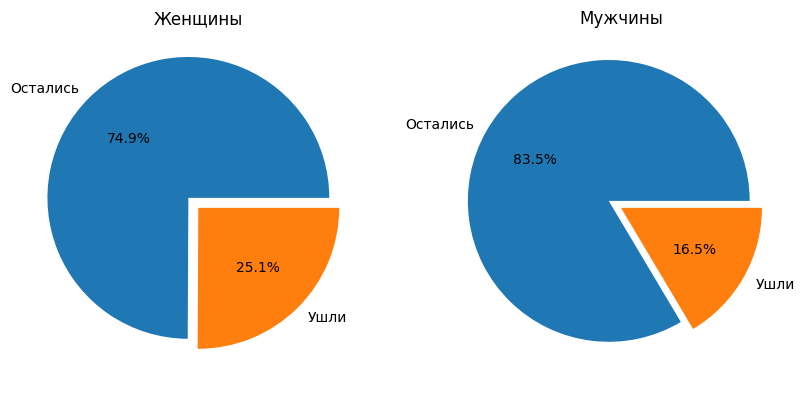

In [7]:
df_ex= churn_data[['Gender', 'Exited']].groupby('Gender')['Exited'].value_counts(normalize=True).unstack()
df_ex=df_ex.T
fig,axes= plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].pie(df_ex['Female'], labels = ['Остались', 'Ушли'], autopct='%.1f%%', explode = [0.1,0]);
axes[0].set_title('Женщины')
axes[1].pie(df_ex['Male'], labels= ['Остались', 'Ушли'],autopct='%.1f%%', explode = [0.1,0]);
axes[1].set_title('Мужчины')
fig.show()

Из диаграммы видно что чаще всего уходят женщины.

#9.7 Как отток клиентов зависит от числа приобретённых у банка услуг?

In [8]:
fig = px.bar(data_frame=churn_data[churn_data['Exited']==1]['NumOfProducts'].value_counts(), x = 'NumOfProducts',title='9.7 Отток клиентов зависит от числа приобретённых у банка услуг')
fig.update_layout(xaxis_title='количество услуг банка', yaxis_title = 'ушедший клиент')
fig.show()


Из диаграммы видно что чем больше услуг у клиента тем меньше он уходит из банка.

#9.8. Как влияет наличие статуса активного клиента на отток клиентов? 

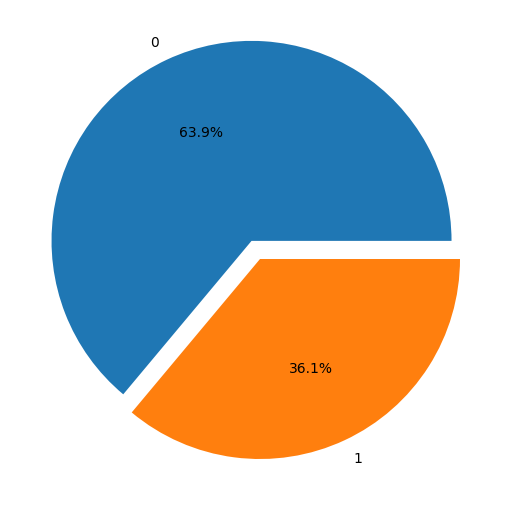

In [9]:
IsActiveMember= churn_data.groupby('IsActiveMember')['Exited'].sum()*100
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(IsActiveMember, labels=IsActiveMember.index, autopct='%.1f%%', explode=[0.1,0]);










Из диаграммы видно что среди ушедших 63,9% были не активные клиенты. По предыдущим диаграммам необходимо клиентам предлагать пакеты услуг, чтобы повысить активность в различных направлениях банка.

#9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [10]:
#import plotly.express as px
new_data = churn_data.groupby('Geography', as_index=False)['Exited'].mean()
fig= px.choropleth(data_frame=new_data,locations = 'Geography', locationmode = 'country names', range_color = [0, 0.4], color = 'Exited',title='Доля ушедших клиентов по странам', scope = 'europe', width=800, height=500)
fig.show()


Из диаграммы видно что доля ушедших клиентов больше в Германии, тогда как в Испании и Франции доли ушедших клиентов примерно равны.

#9.10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.

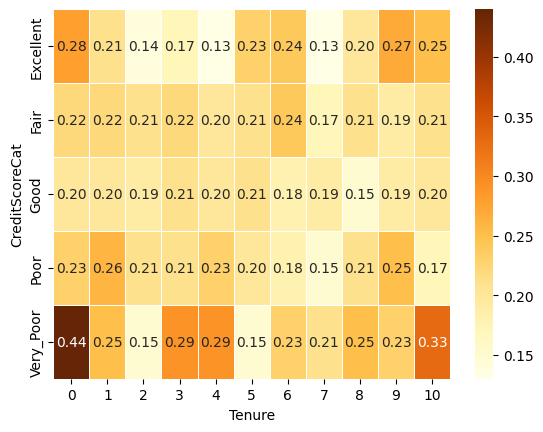

In [14]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
churn_data['CreditScoreCat']= churn_data['CreditScore'].apply(get_credit_score_cat)
pivot_for_heatmap = pd.pivot_table(churn_data, index='CreditScoreCat', columns='Tenure', values='Exited', aggfunc='mean').round(2)
heatmap = sns.heatmap(data=pivot_for_heatmap, cmap='YlOrBr', annot=True, fmt=".2f", linewidths=0.5)

Из диаграммы видно что чаще всего уходят клиенты с кредитным рейтингом Very_Poor, особенно в первый год "клиентства".